# Part One: Data Harvesting

## White House Website News
https://www.whitehouse.gov/news/

In [ ]:
import requests 
import bs4 as bs 

from time import sleep
from time import time
from random import randint

import pandas as pd

In [ ]:
#Harvest White House Website's News with their Dates, Titles, Urls.
titles = []
dates = []
pages = [str(i) for i in range(1,487)] # When we were doing this project, there were 487 pages of news.
urls =[]
headers = {"Accept-Language": "en-US, en;q=0.5"}
for page in pages:
    source = requests.get('https://www.whitehouse.gov/news/page/'+ page, headers = headers)
    sleep(randint(1,2))
    page_html = bs.BeautifulSoup(source.content, 'html.parser')
    news_containers = page_html.find_all('article')  
    for container in news_containers:
        for title in container.find_all('h2'): #titles
            titles.append(title.text.strip()) 
        for date in container.find_all('p', class_="meta__date"): #dates
            dates.append(date.text.strip())
        for url in container.find_all('h2'): #urls
            for url2 in url.find_all('a'):
                link = url2.get("href")
                urls.append(link)

In [ ]:
#Harvest all full-texts from Urls acquired in the first step.
texts = []
for url in urls:
    source = requests.get(url)
    sleep(randint(1,2))
    page_html = bs.BeautifulSoup(source.content, 'html.parser')
    news_containers = page_html.find('div', class_="page-content__content editor")
    clean = news_containers.text.replace('Share:','') # remove the unwanted texts
    clean = clean.replace('share-this-page-on-facebook', '') # remove the unwanted texts
    clean = clean.replace('share-this-page-on-twitter', '') # remove the unwanted texts
    clean = clean.replace('copy-url-to-your-clipboard','') # remove the unwanted texts
    clean = clean.replace('All News', '').strip() # remove the unwanted texts
    clean = clean.replace("\n",'') # remove the unwanted texts
    if '\xa0' in clean: # remove the unwanted texts
        clean = clean.replace('\xa0','')
        texts.append(clean)
    else:texts.append(clean)

In [ ]:
#Create a dictionary from which a dataframe is created subsequently.
pd_us_gov_total = {
    'dates' : dates,
    'titles' : titles,
    'urls' : urls,
    'texts' : texts
}
pd_us_gov_news_total = pd.DataFrame.from_dict(pd_us_gov_total, orient = 'index').transpose()

In [ ]:
# Save the dataframe into a CSV file.
pd_us_gov_news_total.to_csv('white_house_news.csv')

## State Council of China Website News
http://english.gov.cn/news/topnews/

In [ ]:
import requests 
import bs4 as bs 

from time import sleep
from time import time
from random import randint

import pandas as pd 

In [ ]:
#Harvest White House Website's News with their Dates, Titles, Urls.
titles = []
dates = []
urls = []
texts = []


headers = {"Accept-Language": "en-US, en;q=0.5"}

source = requests.get("http://english.gov.cn/news/topnews/", headers = headers) 

page_html = bs.BeautifulSoup(source.content, 'html.parser')

#display=block
news_containers = page_html.find_all('div', style = 'display:block') 
for container in news_containers:

    for title in container.find_all('a'): 
        titles.append(title.text.strip())
    for date in container.find_all('span'):
        dates.append(date.text.strip())
    for url in container.find_all('a'):
        link = "http://english.gov.cn" + url.get('href')
        urls.append(link)

#display=none
news_containers2 = page_html.find_all('div', style = 'display:none')        
for container in news_containers2:

    for title in container.find_all('a'): 
        titles.append(title.text.strip())
    for date in container.find_all('span'):
        dates.append(date.text.strip())
    for url in container.find_all('a'):
        link = "http://english.gov.cn" + url.get('href')
        urls.append(link)

In [ ]:
#Harvest all full-texts from Urls acquired in the first step.
for url in new_urls:
    try: # There are some invalid urls, so try/except statements are used to skip them.
        source = requests.get(url)
        page_html = bs.BeautifulSoup(source.content, 'html.parser')
        news_containers = page_html.find('content')
        new_texts.append(news_containers.text)
    except:
        text = 'no text'
        new_texts.append(text)

In [ ]:
#Create a dictionary from which a dataframe is created subsequently.
cn_gov_news = {'dates':dates,
                  'titles':titles,
                  'urls':urls,
                  'texts':texts
}
pd_cn_gov_news = pd.DataFrame.from_dict(cn_gov_news, orient = 'index').transpose()

In [ ]:
# Save the dataframe into a CSV file.
pd_cn_gov_news.to_csv('cn_gwy_total.csv')

# Part two: Data Cleaning

## White House

### Titles

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('white_house_news.csv')
df1_titles = pd.DataFrame(df1['titles'], columns=['titles'])

In [3]:
df1_titles['titles'] = df1_titles['titles'].fillna('')
df1_titles['titles'] = df1_titles['titles'].str.replace('\n','')
df1_titles['titles'] = df1_titles['titles'].str.replace('\t','')
df1_titles['titles'] = df1_titles['titles'].str.replace('-',' ')
df1_titles['titles'] = df1_titles['titles'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df1_titles['titles'] = df1_titles['titles'].str.replace('[^\w\s]','')

In [4]:
import numpy as np
df1_titles['titles'] = df1_titles['titles'].str.replace('\d+', '')
df1_titles['titles'].replace(' ', np.nan, inplace=True)

In [5]:
from textblob import Word
df1_titles['titles'] = df1_titles['titles'].apply(lambda x: " ".join([Word(word).lemmatize('v') for word in x.split()]))
df1_titles['titles'] = df1_titles['titles'].apply(lambda x: " ".join([Word(word).lemmatize('n') for word in x.split()]))

In [6]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
df1_titles['titles'] = df1_titles['titles'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [7]:
df1_titles['titles'] = df1_titles['titles'].str.findall('\w{2,}').str.join(' ')

In [8]:
df1_titles.head()

,titles
0,american economy rise new height
1,kushner philipson criminal justice reform impr...
2,president trump administration advance free op...
3,remark vice president penny announcement papua...
4,remark president trump tour malibu neighborhood


### Full-texts

In [9]:
df1_texts = pd.DataFrame(df1['texts'], columns=['texts'])

In [10]:
df1_texts['texts'] = df1_texts['texts'].fillna("")
df1_texts['texts'] = df1_texts['texts'].str.replace('\n',' ')
df1_texts['texts'] = df1_texts['texts'].str.replace('\t',' ')
df1_texts['texts'] = df1_texts['texts'].str.replace('[^\w\s]',' ')
df1_texts['texts'] = df1_texts['texts'].str.replace('[ ]{2,}',' ') 

In [11]:
df1_texts['texts'] = df1_texts['texts'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [12]:
import numpy as np
df1_texts['texts'] = df1_texts['texts'].str.replace('\d+', '')
df1_texts['texts'].replace(' ', np.nan, inplace=True)

In [13]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
df1_texts['texts'] = df1_texts['texts'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [14]:
from textblob import Word
df1_texts['texts'] = df1_texts['texts'].apply(lambda x: " ".join([Word(word).lemmatize('v') for word in x.split()]))
df1_texts['texts'] = df1_texts['texts'].apply(lambda x: " ".join([Word(word).lemmatize('n') for word in x.split()]))

In [15]:
df1_texts['texts'] = df1_texts['texts'].str.findall('\w{2,}').str.join(' ')

In [16]:
df1_texts.head()

,texts
0,president trump deliver economic result see ye...
1,cost criminal activity unacceptably high refor...
2,steadfast endure commitment vice president pen...
3,apec hausport moresby papua new guineathe vice...
4,point mugumalibu californianovember pstthe pre...


### Dates

In [17]:
df1_dates = df1.dates

In [18]:
date_series1 = pd.to_datetime(df1_dates)

In [19]:
date_series1 = date_series1.dt.date

In [20]:
date_series1.head()

0    2018-11-19
1    2018-11-19
2    2018-11-18
3    2018-11-18
4    2018-11-18
Name: dates, dtype: object

### Create a cleaned dataframe

In [21]:
a = date_series1.tolist()
b = df1_titles['titles'].tolist()
c = df1_texts['texts'].tolist()
pd_us_news_total = {'dates':a,'titles':b,'texts':c}

In [22]:
USA = pd.DataFrame.from_dict(pd_us_news_total, orient='index').transpose()

In [23]:
USA.to_csv('USA_Cleaned.csv', encoding='utf-8')

In [24]:
USA.head()

,dates,titles,texts
0,2018-11-19,american economy rise new height,president trump deliver economic result see ye...
1,2018-11-19,kushner philipson criminal justice reform impr...,cost criminal activity unacceptably high refor...
2,2018-11-18,president trump administration advance free op...,steadfast endure commitment vice president pen...
3,2018-11-18,remark vice president penny announcement papua...,apec hausport moresby papua new guineathe vice...
4,2018-11-18,remark president trump tour malibu neighborhood,point mugumalibu californianovember pstthe pre...


## State Council

### Titles

In [25]:
import pandas as pd

In [26]:
df2 = pd.read_csv('cn_gwy_total.csv',encoding='utf8')
df2_titles = pd.DataFrame(df2['titles'], columns=['titles'])

In [27]:
df2_titles['titles'] = df2_titles['titles'].fillna('')
df2_titles['titles'] = df2_titles['titles'].str.replace('\n','')
df2_titles['titles'] = df2_titles['titles'].str.replace('\t','')
df2_titles['titles'] = df2_titles['titles'].str.replace('-',' ')
df2_titles['titles'] = df2_titles['titles'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2_titles['titles'] = df2_titles['titles'].str.replace('[^\w\s]','')

In [28]:
import numpy as np
df2_titles['titles'] = df2_titles['titles'].str.replace('\d+', '')
df2_titles['titles'].replace(' ', np.nan, inplace=True)

In [29]:
from textblob import Word
df2_titles['titles'] = df2_titles['titles'].apply(lambda x: " ".join([Word(word).lemmatize('v') for word in x.split()]))
df2_titles['titles'] = df2_titles['titles'].apply(lambda x: " ".join([Word(word).lemmatize('n') for word in x.split()]))

In [30]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
df2_titles['titles'] = df2_titles['titles'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [31]:
df2_titles['titles'] = df2_titles['titles'].str.findall('\w{2,}').str.join(' ')

In [32]:
df2_titles.head()

,titles
0,china add strength digital economy asia pacific
1,respondent satisfy first job
2,key tunnel beijing zhangjiakou railway network...
3,china send satellite orbit via single rocket
4,shaanxi finish panda project year


### Full-texts

In [33]:
df2_texts = pd.DataFrame(df2['texts'], columns=['texts'])

In [34]:
df2_texts['texts'] = df2_texts['texts'].fillna("")
df2_texts['texts'] = df2_texts['texts'].str.replace('\n',' ')
df2_texts['texts'] = df2_texts['texts'].str.replace('\t',' ')
df2_texts['texts'] = df2_texts['texts'].str.replace('[^\w\s]',' ')
df2_texts['texts'] = df2_texts['texts'].str.replace('[ ]{2,}',' ') 

In [35]:
df2_texts['texts'] = df2_texts['texts'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [36]:
import numpy as np
df2_texts['texts'] = df2_texts['texts'].str.replace('\d+', '')
df2_texts['texts'].replace(' ', np.nan, inplace=True)

In [37]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
df2_texts['texts'] = df2_texts['texts'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [38]:
from textblob import Word
df2_texts['texts'] = df2_texts['texts'].apply(lambda x: " ".join([Word(word).lemmatize('v') for word in x.split()]))
df2_texts['texts'] = df2_texts['texts'].apply(lambda x: " ".join([Word(word).lemmatize('n') for word in x.split()]))

In [39]:
df2_texts['texts'] = df2_texts['texts'].str.findall('\w{2,}').str.join(' ')

In [40]:
df2_texts.head()

,texts
0,beijing digital innovation reshape economy asi...
1,beijing survey china youth daily show percent ...
2,drill qinghuayuan tunnel complete nov beijing ...
3,jiuquan china launch new space environment res...
4,shaanxi province spend next decade finish cons...


### Dates

In [41]:
df2_dates = df2.dates

In [42]:
date_series2 = pd.to_datetime(df2_dates)

In [43]:
date_series2 = date_series2.dt.date

In [44]:
date_series2.head()

0    2018-11-20
1    2018-11-20
2    2018-11-20
3    2018-11-20
4    2018-11-20
Name: dates, dtype: object

### Create a cleaned dataframe

In [45]:
e = date_series2.tolist()
f = df2_titles['titles'].tolist()
g = df2_texts['texts'].tolist()
pd_cn_news_total = {'dates':e,'titles':f,'texts':g}

In [46]:
CHN = pd.DataFrame.from_dict(pd_cn_news_total, orient='index').transpose()

In [47]:
CHN.to_csv('CHN_Cleaned.csv', encoding='utf-8')

In [48]:
CHN.head()

,dates,titles,texts
0,2018-11-20,china add strength digital economy asia pacific,beijing digital innovation reshape economy asi...
1,2018-11-20,respondent satisfy first job,beijing survey china youth daily show percent ...
2,2018-11-20,key tunnel beijing zhangjiakou railway network...,drill qinghuayuan tunnel complete nov beijing ...
3,2018-11-20,china send satellite orbit via single rocket,jiuquan china launch new space environment res...
4,2018-11-20,shaanxi finish panda project year,shaanxi province spend next decade finish cons...


# Part Three: Data Exploration
### in this part three online tutorials with their codes are referenced
### https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/
### https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
### https://www.kaggle.com/rcushen/topic-modelling-with-lsa-and-lda

## White House

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from collections import Counter

%matplotlib inline

In [2]:
datafile1 = 'USA_Cleaned.csv'
raw_data1 = pd.read_csv(datafile1, parse_dates=[1], infer_datetime_format=True)

In [3]:
to_drop1 = ['Unnamed: 0','texts']
raw_data1.drop(to_drop1, inplace=True, axis=1)

In [4]:
reindexed_data1 = raw_data1['titles'].fillna('')
reindexed_data1.index = raw_data1['dates']

In [5]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    vectorized_headlines = count_vectorizer.fit_transform(text_data.as_matrix())
    
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0.5,1,'Top 20 Words in Titles: White House')

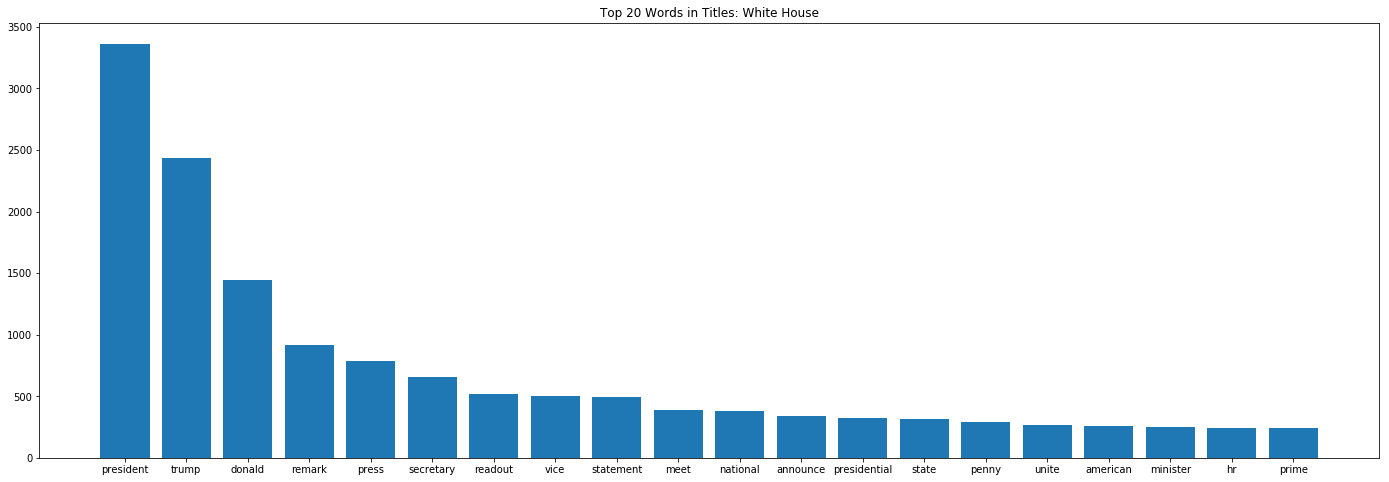

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=20, count_vectorizer=count_vectorizer, text_data=reindexed_data1)

fig, ax = plt.subplots(figsize=(24,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words)
ax.set_title('Top 20 Words in Titles: White House')

In [7]:
raw_data1['titles'] = raw_data1['titles'].fillna('')

In [8]:
M=[]
for i in raw_data1['titles']:
    for m in i.split():
        M.append(m)
a=Counter(M)

In [9]:
a.most_common(10)

[('president', 3364),
 ('trump', 2437),
 ('donald', 1447),
 ('remark', 913),
 ('press', 786),
 ('secretary', 658),
 ('readout', 516),
 ('vice', 505),
 ('statement', 491),
 ('meet', 388)]

Text(0.5,1,'White House News Monthly Counts')

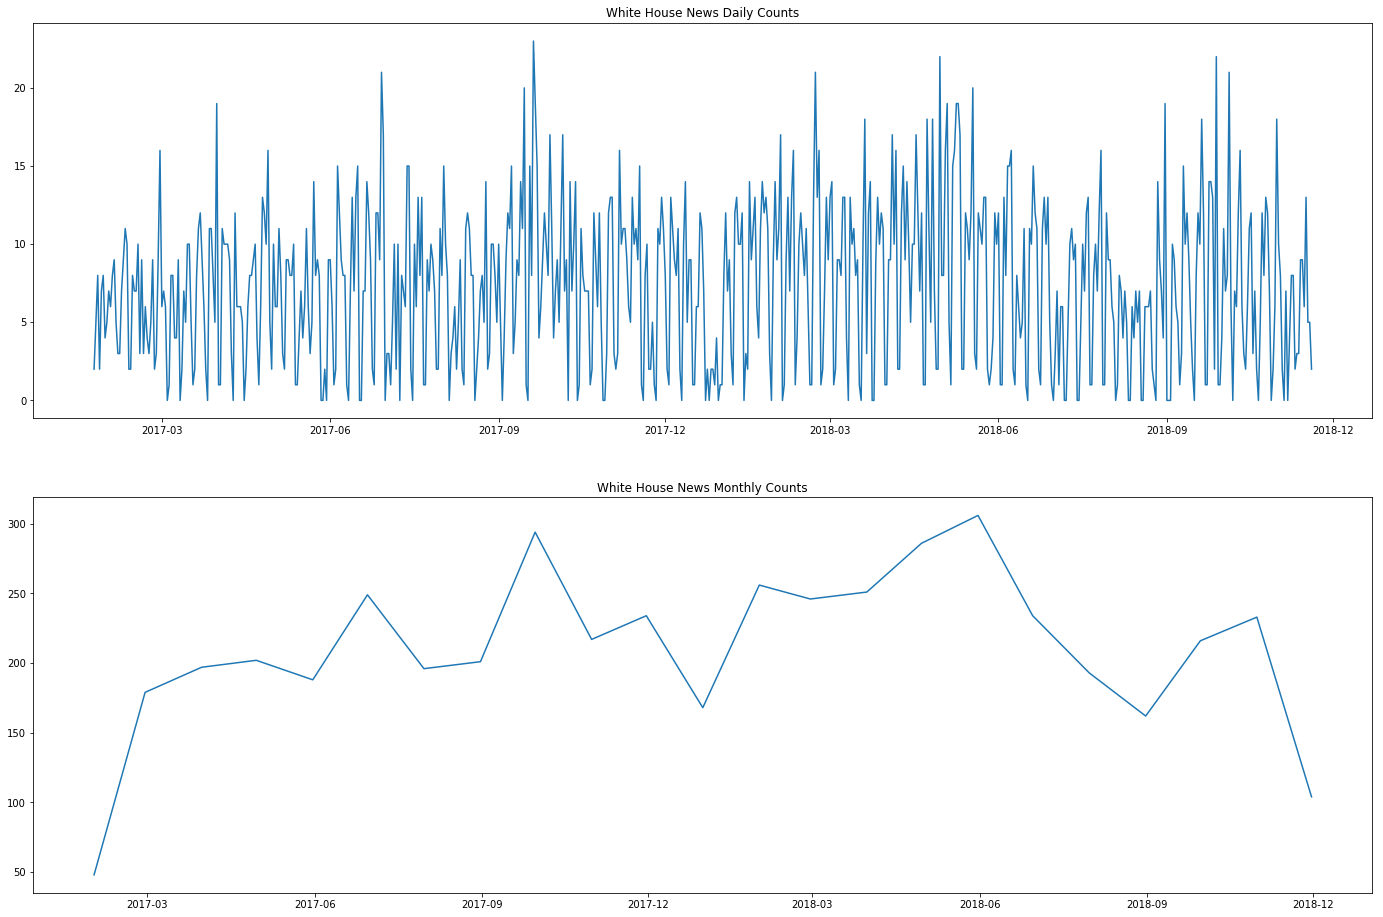

In [10]:
monthly_counts = reindexed_data1.resample('M').count()
daily_counts = reindexed_data1.resample('D').count()

fig, ax = plt.subplots(2, figsize=(24,16))
ax[0].plot(daily_counts)
ax[0].set_title('White House News Daily Counts')
ax[1].plot(monthly_counts)
ax[1].set_title('White House News Monthly Counts')

In [11]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [12]:
df_usa = pd.read_csv('USA_Cleaned.csv')
df_usa_titles = pd.DataFrame(df_usa['titles'], columns=['titles'])
df_usa_titles['titles'] = df_usa['titles'].fillna('')

In [13]:
text_usa = " ".join(title for title in df_usa_titles['titles'])

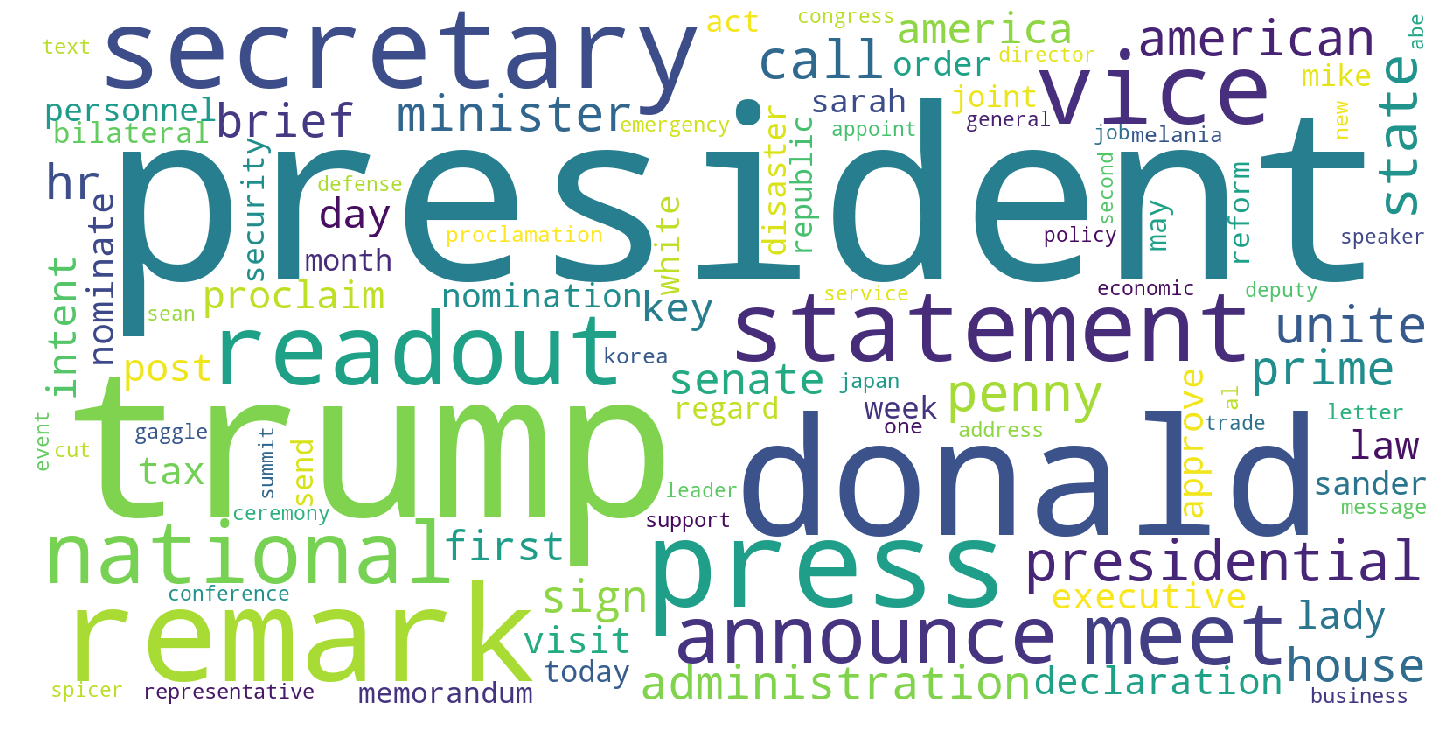

In [14]:
wordcloud = WordCloud(width=1600,height=800,max_words=100,background_color="white",collocations=False).generate(text_usa)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### LDA using bag of words & tf-idf

In [15]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/leiyunong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
df_usa = pd.read_csv('USA_Cleaned.csv',encoding='utf-8')

In [17]:
df_usa_texts = df_usa.texts.fillna('')

In [18]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [19]:
tokenized_usa_texts = df_usa_texts.apply(lambda x: x.split())

In [20]:
dictionary_usa = gensim.corpora.Dictionary(tokenized_usa_texts)

In [21]:
bow_corpus_usa = [dictionary_usa.doc2bow(doc) for doc in tokenized_usa_texts]

In [22]:
from gensim import corpora, models
tfidf_usa = models.TfidfModel(bow_corpus_usa)
corpus_tfidf_usa = tfidf_usa[bow_corpus_usa]

In [23]:
#LDA using bag of words
lda_model_usa = gensim.models.LdaMulticore(bow_corpus_usa, num_topics=6, id2word=dictionary_usa, passes=5, workers=2)

In [24]:
for idx, topic in lda_model_usa.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.022*"president" + 0.020*"think" + 0.016*"go" + 0.014*"mr" + 0.012*"say" + 0.012*"spicer" + 0.011*"get" + 0.008*"make" + 0.007*"one" + 0.007*"people"
Topic: 1 
Words: 0.016*"state" + 0.011*"president" + 0.010*"unite" + 0.009*"national" + 0.009*"law" + 0.009*"secretary" + 0.009*"order" + 0.008*"federal" + 0.007*"shall" + 0.007*"security"
Topic: 2 
Words: 0.032*"president" + 0.013*"state" + 0.011*"unite" + 0.011*"trump" + 0.009*"go" + 0.008*"people" + 0.008*"thank" + 0.007*"say" + 0.006*"country" + 0.005*"know"
Topic: 3 
Words: 0.014*"president" + 0.013*"applause" + 0.013*"go" + 0.012*"american" + 0.011*"thank" + 0.010*"people" + 0.009*"great" + 0.008*"america" + 0.008*"know" + 0.007*"year"
Topic: 4 
Words: 0.023*"president" + 0.017*"trump" + 0.007*"judge" + 0.006*"american" + 0.006*"make" + 0.006*"court" + 0.005*"order" + 0.005*"gorsuch" + 0.005*"agency" + 0.005*"go"
Topic: 5 
Words: 0.013*"president" + 0.013*"state" + 0.012*"american" + 0.010*"unite" + 0.007*"job" + 0

In [25]:
#LDA using tf-idf
lda_model_tfidf_usa = gensim.models.LdaMulticore(corpus_tfidf_usa, num_topics=6, id2word=dictionary_usa, passes=5, workers=2)

In [26]:
for idx, topic in lda_model_tfidf_usa.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.001*"kuczynski" + 0.001*"peru" + 0.001*"turkey" + 0.001*"lady" + 0.001*"minister" + 0.001*"saudi" + 0.001*"holy" + 0.001*"prime" + 0.001*"trump" + 0.001*"discus"
Topic: 1 Word: 0.001*"seuss" + 0.001*"em" + 0.001*"oai" + 0.001*"xi" + 0.001*"egg" + 0.001*"internship" + 0.000*"easter" + 0.000*"bilden" + 0.000*"kuwait" + 0.000*"no"
Topic: 2 Word: 0.004*"go" + 0.003*"applause" + 0.003*"think" + 0.003*"spicer" + 0.003*"thank" + 0.003*"mr" + 0.002*"say" + 0.002*"get" + 0.002*"american" + 0.002*"people"
Topic: 3 Word: 0.003*"minister" + 0.003*"prime" + 0.002*"cooperation" + 0.002*"bilateral" + 0.002*"leader" + 0.002*"vice" + 0.002*"discus" + 0.002*"nato" + 0.002*"egypt" + 0.002*"download"
Topic: 4 Word: 0.004*"shall" + 0.003*"emergency" + 0.003*"section" + 0.003*"order" + 0.002*"federal" + 0.002*"fema" + 0.002*"korea" + 0.002*"executive" + 0.002*"act" + 0.002*"law"
Topic: 5 Word: 0.002*"district" + 0.002*"assistant" + 0.002*"vice" + 0.001*"regulation" + 0.001*"expire" + 0.001*

### LSA

In [27]:
detokenized_usa_texts = []

In [28]:
for i in range(len(df_usa_texts)):
    t = ' '.join(tokenized_usa_texts[i])
    detokenized_usa_texts.append(t)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorizer_usa = TfidfVectorizer(stop_words='english', max_df = 0.5, smooth_idf=True)

X = vectorizer_usa.fit_transform(detokenized_usa_texts)

X.shape

(4860, 32673)

In [31]:
from sklearn.decomposition import TruncatedSVD
svd_model_usa = TruncatedSVD(n_components=6, algorithm='randomized', n_iter=100, random_state=122)
svd_model_usa.fit(X)
len(svd_model_usa.components_)

6

In [32]:
terms_usa = vectorizer_usa.get_feature_names()
for i, comp in enumerate(svd_model_usa.components_):
    terms_comp = zip(terms_usa, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": \n")
    for t in sorted_terms:
        print(t[0],'*',t[1])

Topic 0: 

thank * 0.21242299517376861
say * 0.1818279491768569
applause * 0.18114676726527965
think * 0.1776445687807037
people * 0.17477586775006018
know * 0.15388136697948235
want * 0.14777631311783634
tax * 0.1344121980277085
great * 0.1310948593618841
mr * 0.12583144798073995
Topic 1: 

federal * 0.2755989742876373
emergency * 0.26892373072885617
fema * 0.2346623795550501
order * 0.1500686491001042
national * 0.12576082144826958
assistance * 0.11291856944174379
security * 0.11106327493117604
executive * 0.10887164161573486
desk * 0.10636365844633354
fund * 0.10588242564141218
Topic 2: 

tax * 0.2533898731654797
applause * 0.24330776484461036
fema * 0.23315443851449807
federal * 0.18701064970483144
emergency * 0.11103054196966239
desk * 0.10846288635830946
job * 0.10115250575539737
cut * 0.09978042210427145
cost * 0.08966488810554879
thank * 0.08964141665701536
Topic 3: 

tax * 0.3372818430380146
applause * 0.1731827224110948
business * 0.14646900384237488
america * 0.1381861029711

## State Council

In [33]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from collections import Counter

%matplotlib inline

In [34]:
datafile2 = 'CHN_Cleaned.csv'
raw_data2 = pd.read_csv(datafile2, parse_dates=[1], infer_datetime_format=True)

In [35]:
to_drop2 = ['Unnamed: 0','texts']
raw_data2.drop(to_drop2, inplace=True, axis=1)

In [36]:
reindexed_data2 = raw_data2['titles'].fillna('')
reindexed_data2.index = raw_data2['dates']

In [37]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    vectorized_headlines = count_vectorizer.fit_transform(text_data.as_matrix())
    
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0.5,1,'Top 20 Words in Titles: State Council')

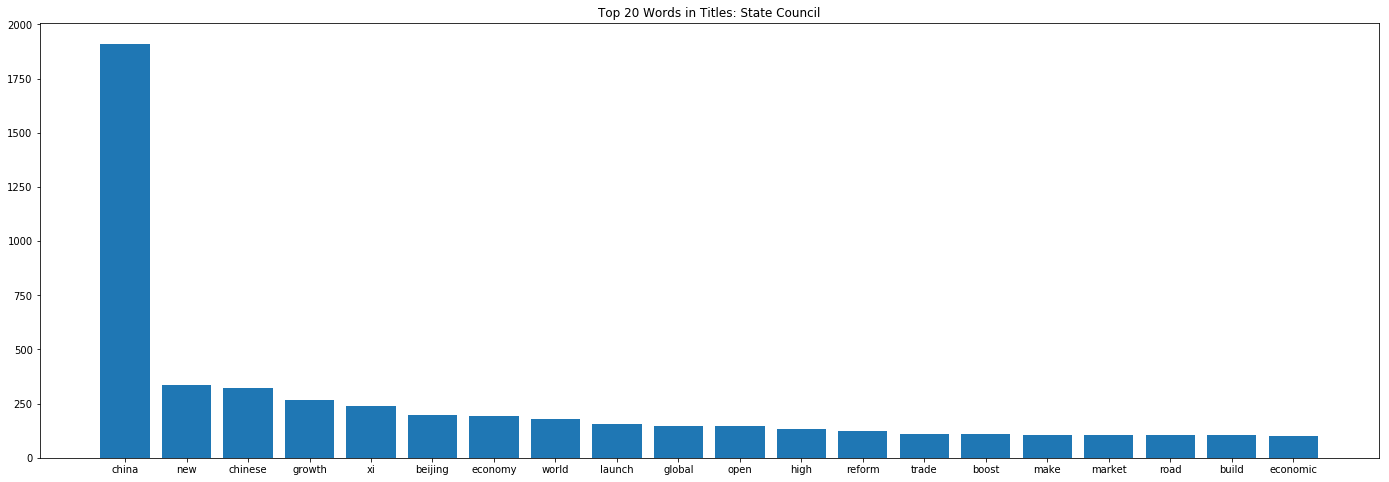

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=20, count_vectorizer=count_vectorizer, text_data=reindexed_data2)

fig, ax = plt.subplots(figsize=(24,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words)
ax.set_title('Top 20 Words in Titles: State Council')

In [39]:
raw_data2['titles'] = raw_data2['titles'].fillna('')

In [40]:
N=[]
for i in raw_data2['titles']:
    for n in i.split():
        N.append(n)
b=Counter(N)

In [41]:
b.most_common(10)

[('china', 1911),
 ('new', 336),
 ('chinese', 323),
 ('growth', 265),
 ('xi', 239),
 ('beijing', 198),
 ('economy', 191),
 ('world', 180),
 ('first', 154),
 ('launch', 154)]

Text(0.5,1,'State Council News Monthly Counts')

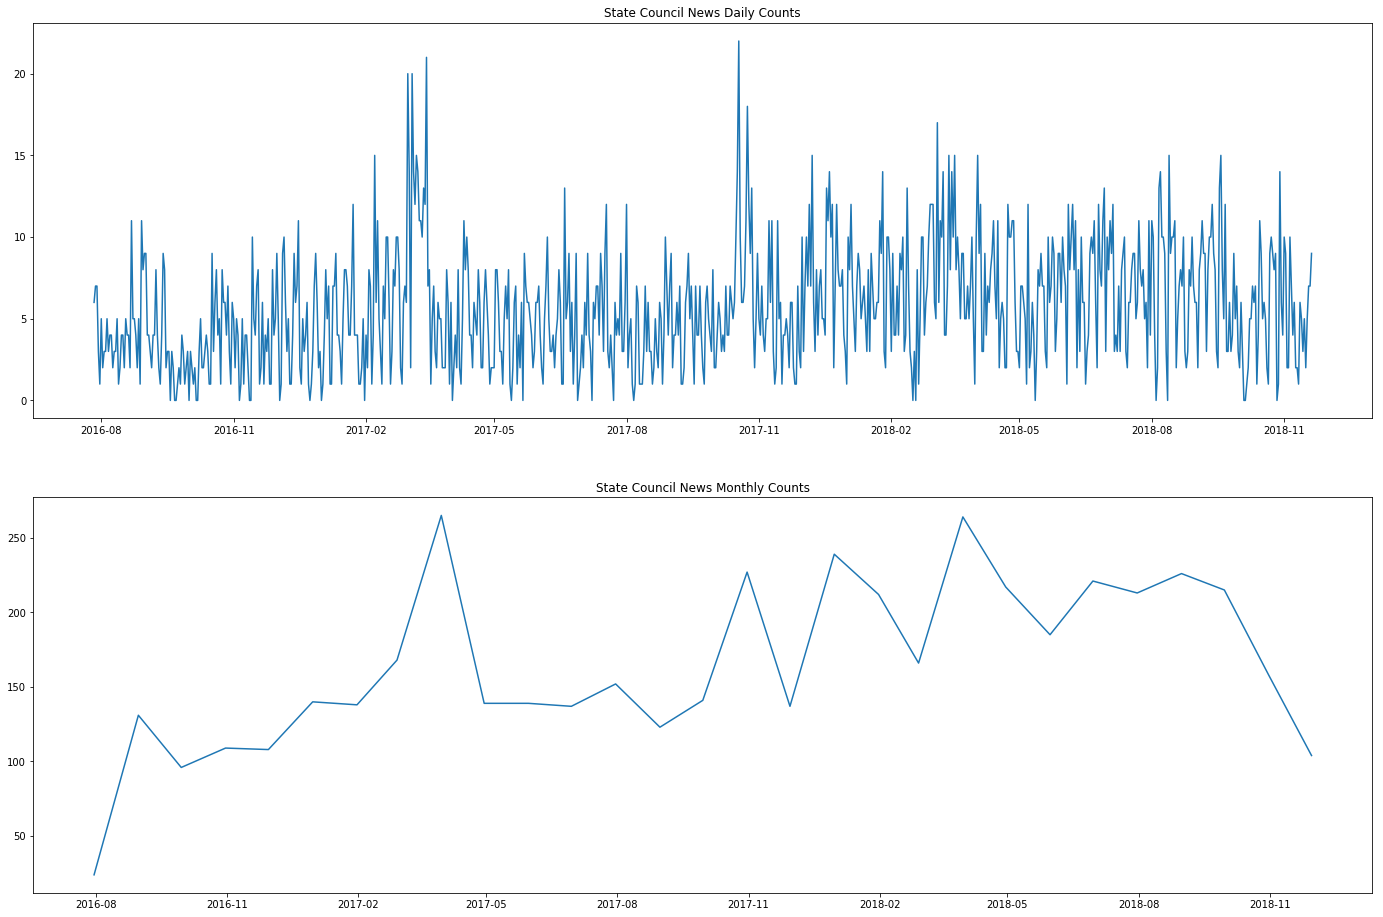

In [42]:
monthly_counts = reindexed_data2.resample('M').count()
daily_counts = reindexed_data2.resample('D').count()

fig, ax = plt.subplots(2, figsize=(24,16))
ax[0].plot(daily_counts)
ax[0].set_title('State Council News Daily Counts')
ax[1].plot(monthly_counts)
ax[1].set_title('State Council News Monthly Counts')

In [43]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [44]:
df_chn = pd.read_csv('CHN_Cleaned.csv')
df_chn_titles = pd.DataFrame(df_chn['titles'], columns=['titles'])
df_chn_titles['titles'] = df_chn['titles'].fillna('')

In [45]:
text_chn = " ".join(title for title in df_chn_titles['titles'])

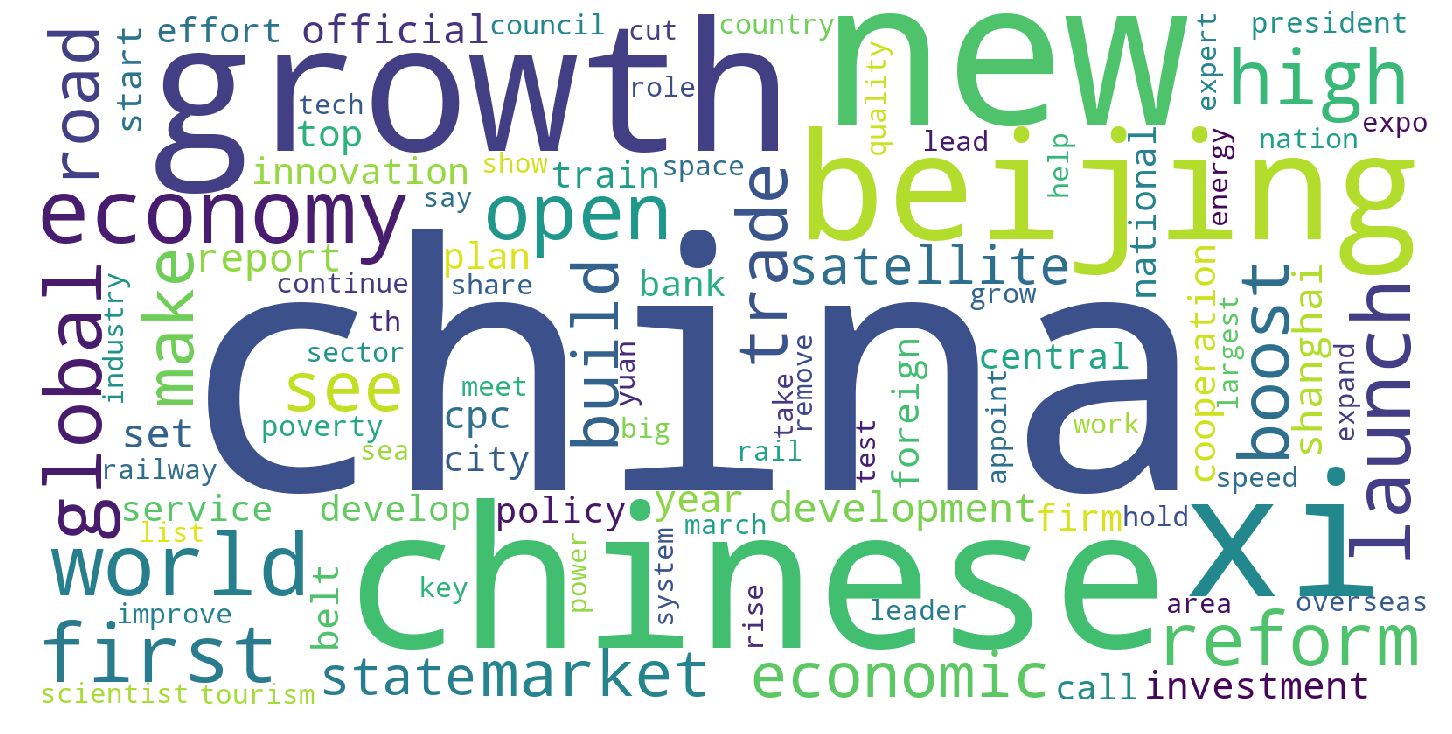

In [46]:
wordcloud_chn = WordCloud(width=1600,height=800,max_words=100,background_color="white",collocations=False).generate(text_chn)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud_chn)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### LDA using bag of words & tf-idf

In [47]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/leiyunong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
df_chn = pd.read_csv('CHN_Cleaned.csv',encoding='utf-8')
df_chn_texts = df_chn.texts.fillna('')

In [49]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [50]:
tokenized_chn_texts = df_chn_texts.apply(lambda x: x.split())

In [51]:
dictionary_chn = gensim.corpora.Dictionary(tokenized_chn_texts)

In [52]:
bow_corpus_chn = [dictionary_chn.doc2bow(doc) for doc in tokenized_chn_texts]

In [53]:
from gensim import corpora, models
tfidf_chn = models.TfidfModel(bow_corpus_chn)
corpus_tfidf_chn = tfidf_chn[bow_corpus_chn]

In [54]:
#LDA using bag of words
lda_model_chn = gensim.models.LdaMulticore(bow_corpus_chn, num_topics=6, id2word=dictionary_chn, passes=5, workers=2)

In [56]:
for idx, topic in lda_model_chn.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.017*"say" + 0.012*"china" + 0.010*"year" + 0.009*"government" + 0.007*"beijing" + 0.006*"accord" + 0.006*"yuan" + 0.006*"million" + 0.005*"city" + 0.005*"area"
Topic: 1 
Words: 0.017*"china" + 0.014*"say" + 0.010*"chinese" + 0.009*"company" + 0.008*"percent" + 0.008*"year" + 0.007*"innovation" + 0.006*"new" + 0.006*"development" + 0.006*"market"
Topic: 2 
Words: 0.020*"china" + 0.019*"say" + 0.011*"xi" + 0.009*"party" + 0.009*"central" + 0.008*"people" + 0.008*"chinese" + 0.008*"country" + 0.007*"committee" + 0.007*"bank"
Topic: 3 
Words: 0.024*"china" + 0.016*"say" + 0.010*"space" + 0.010*"chinese" + 0.009*"year" + 0.008*"satellite" + 0.006*"tourism" + 0.006*"launch" + 0.005*"country" + 0.005*"beijing"
Topic: 4 
Words: 0.040*"china" + 0.019*"say" + 0.014*"growth" + 0.012*"economic" + 0.011*"year" + 0.011*"economy" + 0.009*"country" + 0.009*"global" + 0.009*"world" + 0.009*"percent"
Topic: 5 
Words: 0.022*"year" + 0.019*"percent" + 0.017*"china" + 0.015*"say" + 0.009

In [57]:
#LDA using tf-idf
lda_model_tfidf_chn = gensim.models.LdaMulticore(corpus_tfidf_chn, num_topics=6, id2word=dictionary_chn, passes=5, workers=2)

In [58]:
for idx, topic in lda_model_tfidf_chn.print_topics(-1):
    print('Topic: {} \nWord: {}'.format(idx, topic))

Topic: 0 
Word: 0.009*"space" + 0.008*"satellite" + 0.004*"rocket" + 0.004*"tiangong" + 0.004*"launch" + 0.003*"shenzhou" + 0.003*"astronaut" + 0.003*"orbit" + 0.003*"spacecraft" + 0.003*"man"
Topic: 1 
Word: 0.004*"growth" + 0.004*"percent" + 0.003*"economy" + 0.002*"economic" + 0.002*"investment" + 0.002*"yuan" + 0.002*"trade" + 0.002*"market" + 0.002*"bank" + 0.002*"year"
Topic: 2 
Word: 0.003*"poverty" + 0.002*"energy" + 0.001*"pollution" + 0.001*"air" + 0.001*"power" + 0.001*"summit" + 0.001*"carbon" + 0.001*"winter" + 0.001*"rice" + 0.001*"million"
Topic: 3 
Word: 0.002*"kong" + 0.002*"hong" + 0.002*"stock" + 0.001*"npc" + 0.001*"committee" + 0.001*"park" + 0.001*"cpc" + 0.001*"party" + 0.001*"people" + 0.001*"draft"
Topic: 4 
Word: 0.002*"aircraft" + 0.001*"flight" + 0.001*"water" + 0.001*"food" + 0.001*"council" + 0.001*"appoint" + 0.001*"administration" + 0.001*"comac" + 0.001*"toilet" + 0.001*"safety"
Topic: 5 
Word: 0.002*"cpc" + 0.002*"xi" + 0.002*"asean" + 0.002*"party" + 

### LSA

In [59]:
detokenized_chn_texts = []

In [60]:
for i in range(len(df_chn_texts)):
    t = ' '.join(tokenized_chn_texts[i])
    detokenized_chn_texts.append(t)

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
vectorizer_chn = TfidfVectorizer(stop_words='english', max_df = 0.5, smooth_idf=True)

Y = vectorizer_chn.fit_transform(detokenized_chn_texts)

Y.shape

(4794, 21127)

In [63]:
from sklearn.decomposition import TruncatedSVD
svd_model_chn = TruncatedSVD(n_components=6, algorithm='randomized', n_iter=100, random_state=122)
svd_model_chn.fit(Y)
len(svd_model_chn.components_)

6

In [64]:
terms_chn = vectorizer_chn.get_feature_names()
for i, comp in enumerate(svd_model_chn.components_):
    terms_comp = zip(terms_chn, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": \n")
    for t in sorted_terms:
        print(t[0],'*',t[1])

Topic 0: 

percent * 0.22843516804377706
growth * 0.19482910275792226
economic * 0.14015556324865439
economy * 0.13385696285598808
development * 0.12336031359018743
investment * 0.11468302133756639
new * 0.10965234140057767
trade * 0.10840512183277257
market * 0.10773450130544739
yuan * 0.1033271285397802
Topic 1: 

xi * 0.3176142044250157
cpc * 0.2527626923707069
party * 0.21839104562811518
committee * 0.20474914226259633
central * 0.14089638940039811
people * 0.12726547924270148
th * 0.11298765025967088
political * 0.11090275507065794
president * 0.10901025505840746
congress * 0.10230658217189775
Topic 2: 

satellite * 0.30674556331586667
space * 0.23741388590811527
rocket * 0.16237675952376504
launch * 0.15936160343011713
railway * 0.14894191968295895
train * 0.1248309228879271
orbit * 0.11463355489655495
technology * 0.11418756162851432
station * 0.09996256760999159
speed * 0.09774996904098424
Topic 3: 

satellite * 0.34493820798155195
space * 0.25526554035724897
rocket * 0.1913568